In [252]:
# What version python do you have 
#import tensorflow.keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

check_gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if check_gpu \
      else "NOT AVAILABLE" )

GPU is available


In [253]:
#tipos de datos 
DTYPE = 'float32'
tf.keras.backend.set_floatx(DTYPE)   #establece el tipo de float predeterminado

In [254]:
#Numero de Puntos
N_r = 200

#Dominio 1
xmin = 0
xmax = 10


#Dibujo de un muestreo uniforme de los puntos de colocación
X_r = tf.random.uniform((N_r,1), xmin, xmax, dtype = DTYPE)

In [322]:
x_1 = tf.constant( 0  ,shape = (1,1), dtype = DTYPE )
x_2 = tf.constant( 0  ,shape = (1,1), dtype = DTYPE )
X_data = [x_1, x_2]

u_data_1 = tf.constant( 1  ,shape = (1,1), dtype = DTYPE )
u_data_2 = tf.constant( 0  ,shape = (1,1), dtype = DTYPE )

u_data = [u_data_1, u_data_2]

In [323]:
u_data_1

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [324]:
def fun_0( x, y, ddy_ddx):
    #y = np.expand_dims(y, axis = -1)
   
    return ddy_ddx + tf.math.sin(y)

In [325]:
#Configuración Red Neuronal
def init_model(num_hidden_layers = 2, num_neurons_per_layer = 20 ):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(1))
    
    # Introduce a scaling layer to map input to [lb, ub]
    #scaling_layer = tf.keras.layers.Lambda(
    #            lambda x: 2.0*(x - 0)/(10 - 0) - 1.0)
    #model.add(scaling_layer)
    
    for _ in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(num_neurons_per_layer, 
                                        activation = tf.keras.activations.get('sigmoid'),
                                       kernel_initializer = 'glorot_normal'))
    model.add(tf.keras.layers.Dense(1))
    
    return model

In [364]:
def get_r1(model, X_r): 
    x = X_r
    
    with tf.GradientTape(persistent=True) as tape2:
        tape2.watch(x)
        with tf.GradientTape() as tape:
            tape.watch(x)
            y = model(x, training = True)
        df = tape.gradient(y,x)
    #df_dx = df[:, 0]
    #df_dy = df[:, 1]


    ddy_ddx = tape2.gradient(df,x)
#d2f_dy2 = tape2.gradient(df_dy,xy)[:,1]

    
    
    
    return fun_0( x, y, ddy_ddx)
        
    #return fun_0(x, y, dy_dx) 

In [ ]:
with tf.GradientTape(persistent=True) as tape2:
    tape2.watch(x_b)
    with tf.GradientTape() as tape:
        tape.watch(x_b)
        y = model(x_b)
    df = tape.gradient(y,x_b)
    #df_dx = df[:, 0]
    #df_dy = df[:, 1]


d2f_dx2 = tape2.gradient(df,x_b)
#d2f_dy2 = tape2.gradient(df_dy,xy)[:,1]
del tape2

In [326]:
def get_r(model, X_r): 
    x = X_r
       
    with tf.GradientTape(persistent = True) as tape:         
        tape.watch(x)
        y = model(tf.stack([x], axis=1), training = True)    
        dy_dx = tape.gradient(y,x)
    ddy_ddx = tape.gradient(dy_dx,x)
    
    #del tape
    
    
    return fun_0( x, y, ddy_ddx)
        
    #return fun_0(x, y, dy_dx) 

In [327]:
#x = X_r
#y = model(X_r)  

In [328]:
#y

In [329]:
#model = init_model()

In [330]:
#get_r(model, X_r)

In [331]:
#x_b = X_data[1]

In [332]:
#with tf.GradientTape(persistent = True) as tape: 
#    tape.watch(X_r)
#    yy = model(tfX_r)
#dyy = tape.gradient(yy, X_r)
    

In [333]:
X_data[1]

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>

In [372]:
def compute_loss(model, X_r, X_data, u_data):
    
    # Compute phi^r
    r = get_r1(model, X_r)
    phi_r = tf.reduce_mean(tf.square(r))
    
    # Initialize loss
    loss = phi_r
    
    # Add phi^0 and phi^b to the loss
    u_pred1 = model(X_data[0])
    loss += tf.reduce_mean(tf.square(u_data[0] - u_pred1))
        
    #pérdida de la derivada del modelo en cero
    
    x_b = X_data[1]
    with tf.GradientTape(persistent = True) as tape:         
        tape.watch(x_b)
        y = model(tf.stack([x_b], axis=1), training = True)    
    dy_dx = tape.gradient(y,x_b)
    #ddy_ddx = tape.gradient(dy_dx,x_b)
    #u_pred2 =  ddy_ddx
    loss += tf.reduce_mean(tf.square(u_data[1] - dy_dx))    
    #x = tf.Variable(1.0)  # Create a Tensorflow variable initialized to 1.0

   
    #loss += tf.reduce_mean(tf.square(u_data[1] - d2y_dx2_b))  
    
    return loss



In [350]:
x_b = X_data[1]

In [351]:
with tf.GradientTape(persistent=True) as tape2:
    tape2.watch(x_b)
    with tf.GradientTape() as tape:
        tape.watch(x_b)
        y = model(x_b)
    df = tape.gradient(y,x_b)
    #df_dx = df[:, 0]
    #df_dy = df[:, 1]


d2f_dx2 = tape2.gradient(df,x_b)
#d2f_dy2 = tape2.gradient(df_dy,xy)[:,1]
del tape2

In [352]:
d2f_dx2

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.01565695]], dtype=float32)>

In [366]:
#Calculo de gradientes de la función de pérdida

#def get_grad(model, X_r, X_data, u_data):
def get_grad(model, X_r, X_data, u_data):
    with tf.GradientTape(persistent = True) as tape: 
        tape.watch(model.trainable_variables)
        loss = compute_loss(model, X_r, X_data, u_data)
        #loss = compute_loss(model, X_r, X_data, u_data)
        
    g = tape.gradient(loss, model.trainable_variables)    
    #del tape
    
    return loss, g

In [373]:
# Initialize model aka u_\theta
model = init_model()

# Choose the optimizer
optim = tf.keras.optimizers.Adam(0.01)

In [379]:
from time import time 

#@tf.function 
def train_step():
    loss, grad_theta = get_grad(model, X_r, X_data, u_data)
    #loss, grad_theta = get_grad(model, X_r, X_data, u_data)
    
    #Realizar paso del descenso de gradiente
    optim.apply_gradients(zip(grad_theta, model.trainable_variables))
    
    return loss

#Número de Épocas
N = 4000
hist = []

#Comienzo del tiempo
t0 = time()

for i in range(N+1):
    
    loss = train_step()
    hist.append(loss.numpy())
    
    #Salida después de 50 iteraciones
    if i%1000 == 0:
        print('It {:05d}: loss = {:10.8e}'. format(i,loss))
        
#Mostrar tiempo de calculo 
print('\nComputation time: {} seconds'.format(time()-t0))

It 00000: loss = 1.35130994e-03
It 01000: loss = 7.05077720e-04
It 02000: loss = 4.19333926e-04
It 03000: loss = 2.55200488e-04
It 04000: loss = 1.69765146e-04

Computation time: 63.88035297393799 seconds


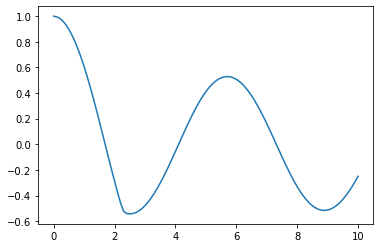

In [380]:
# Gráfica

N = 100
xspace = np.linspace(xmin, xmax, N + 1)
x_test = tf.constant(xspace, shape = (N+1,1) , dtype = DTYPE)
plt.plot(x_test, model(x_test)[:,0:1])
#plt.axis([0,10,0.9995,1.0005])

In [109]:

with tf.GradientTape(persistent = True) as tape:         
    tape.watch(x_1)
    y1 = model(tf.stack(x_1))    
dy_dx1 = tape.gradient(y1,x_1)
print(dy_dx1)

tf.Tensor([[0.8552072]], shape=(1, 1), dtype=float32)


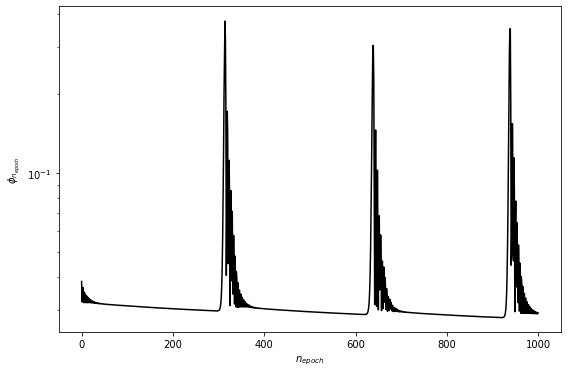

In [306]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.semilogy(range(len(hist)), hist,'k-')
ax.set_xlabel('$n_{epoch}$')
ax.set_ylabel('$\\phi_{n_{epoch}}$');